## Day and Night Image Classifier
---
The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

Goal is to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images.

### Import Resources

In [1]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

### Load the datasets

Load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

First image-label pair in `IMAGE_LIST` can be accessed by index: `IMAGE_LIST[0][:]`

In [3]:
# Using the load_daaset function in helpers.py 
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

### 1. Visualize the input images

Shape: (458, 800, 3)
Label: day


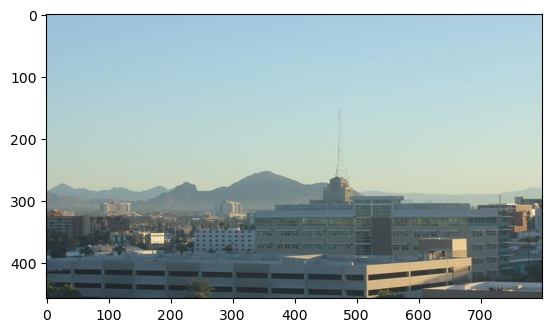

In [4]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it 
plt.imshow(selected_image)
print("Shape: " + str(selected_image.shape))
print("Label: " + str(selected_label))

### 2. Pre-process the Data

After loading in each image, the input and output should be standardized.

#### Input
It's important to make all the images the same size so that they can be sent through the same pipeline of classification steps. Every input image should be in the same format, of the same size, and so on.

#### Standardize the Input Images
* Resize each image to the desired input size: 600x1100px

In [5]:
# This function takes in an RGB image and returns a new, standardized version
def standardize_input(image):
    
    ## Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

#### Standardize the Output

With each loaded image, the expected output should be specified. For this, binary numerical values 0/1 = night/day will be used.

In [6]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    if(label == 'day'):
        numerical_val = 1 # else it's night and can stay as 0
    
    return numerical_val

### Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [7]:
# Using both functions above, standardize the input images and output labels
def standardize(image_list):
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)

        # Append the image, and it's one hot encoded label to the full, 
        #processed list of image data
        standard_list.append((standardized_im, binary_label))

    return standard_list

In [8]:
# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

### Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


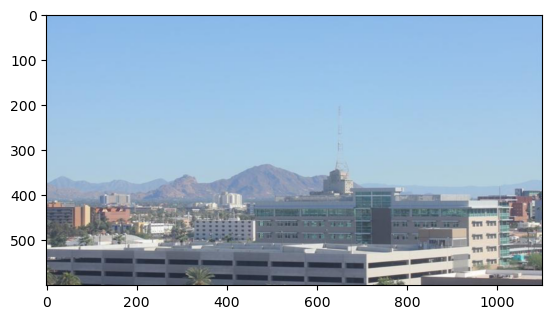

In [9]:
# Select an image by index
image_num = 8
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it 
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

### Feature Extraction

Create a feature that represents the brightness in an image. Average brightness can be extracted using the HSV colorspace. Specifically, the V channel(a measure of brightness) will be used, adding up the pixel values in V channel, then dividing the sum by the area of the image to get the average Value of the image. 

#### RGB to HSV Conversion

Converting a test image from RGB to HSV colorspace and each component is displayed in an image.

Label: 1


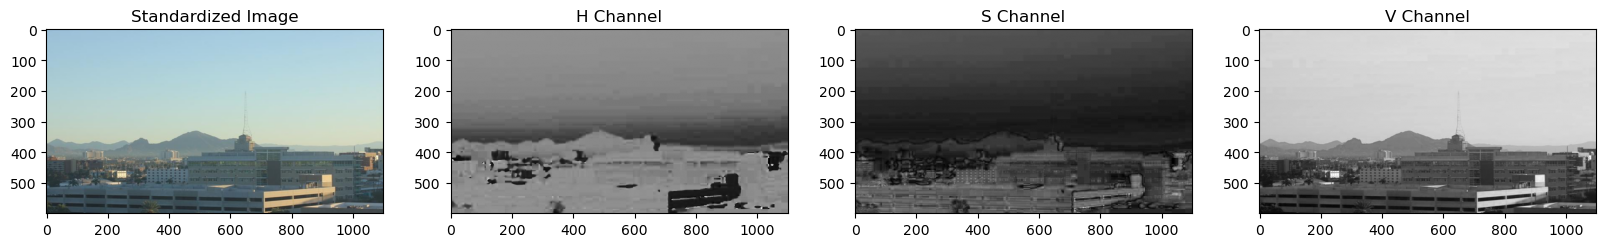

In [10]:
# Convert an image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Conver to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print the image label
print('Label: ' +str(test_label))

# HSV Channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,10))
ax1.set_title('Standardized Image')
ax1.imshow(test_im)

ax2.set_title('H Channel')
ax2.imshow(h, cmap = 'gray')

ax3.set_title('S Channel')
ax3.imshow(s, cmap = 'gray')

ax4.set_title('V Channel')
ax4.imshow(v, cmap = 'gray')


#### Find the average brightness using the V channel

In [11]:
# Find the average value or brightness of an image
def avg_brightness(rgb_image):
    """
    This function takes in a standardized RGB image and returns a feature (a single value)

    that represent the average level of brightness in the image. This average brightness

    value to classify the image as dayy or night.
    """
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])

    # Calculate the average brightness using the area of the image
    # and the sum calculated
    area = 600*1100.0 
    
    avg = sum_brightness / area

    return avg

Avg brightness: 35.217


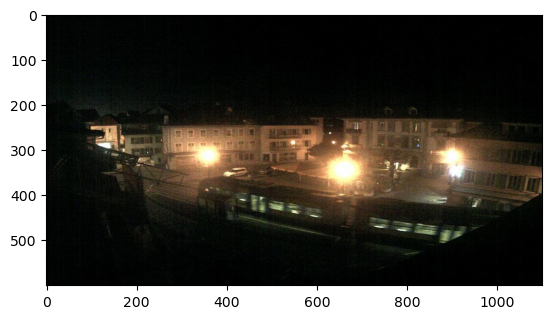

In [12]:
# Testing average brightness levels 
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' +str(avg))
plt.imshow(test_im)

#### Classification

Turn average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively)

In [21]:
def estimate_label(rgb_image):

    predicted_label = 0
    avg = avg_brightness(rgb_image)
    threshold = 110
    if (avg > threshold):
        predicted_label = 1 # else predicted label should stay as 0 (night)

    return predicted_label

#### Testing the Classifier

In [22]:
import random 

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
# In thşs way order won't play a role in testing accuracy
random.shuffle(STANDARDIZED_TEST_LIST)

#### Determine the Accuracy

In [23]:
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from the classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels
        if (predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))

        # Return the list of misclassified [image, predicted_label, true_label]
        return misclassified_images_labels

In [24]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 1.0
Number of misclassified images = 0 out of 160
